NAME : AARUSHI RAY
EMAIL: 2129002@kiit.ac.in
Number: 8655738790

HOUSE RENT PREDICTION PROJECT

In [1]:
#importing generic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA PREPROCESSING

In [2]:
#importing dataset
df = pd.read_csv('House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,18-05-2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,15-05-2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,10-07-2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,06-07-2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
#structure of the dataset
df.shape

(4746, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
#converting the type of 'posted on' column from string object to datetime
df["Posted On"] = pd.to_datetime(df["Posted On"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


C:\Users\KIIT\AppData\Local\Temp\ipykernel_14192\371155474.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Posted On"] = pd.to_datetime(df["Posted On"])


In [6]:
#droping null values and looking for duplicates
df = df.dropna()
df.duplicated().sum()

0

EDA

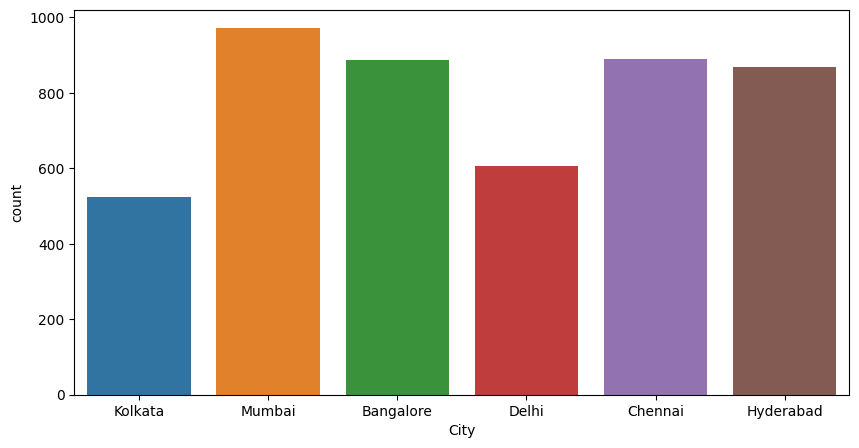

In [7]:
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(df,x='City')
plt.show()

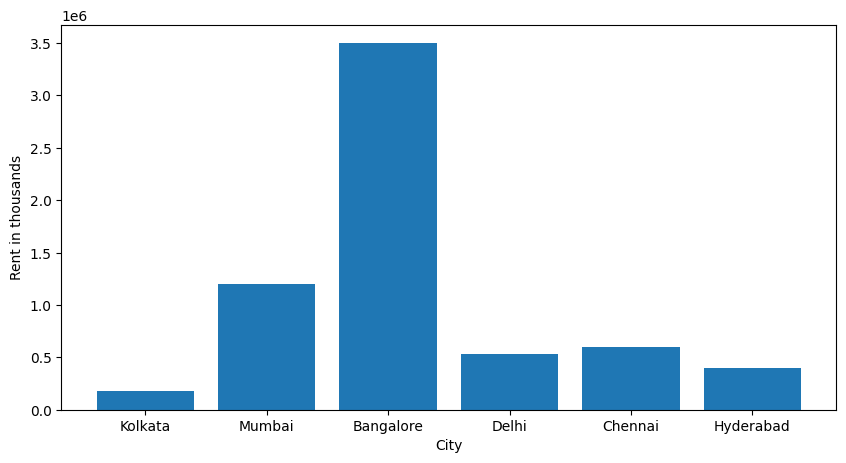

In [8]:
#city wise rent fluctuations
fig,ax = plt.subplots(figsize=(10,5))
plt.bar(df['City'],df['Rent'])
plt.xlabel("City")
plt.ylabel("Rent in thousands")
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_14192\2817941570.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


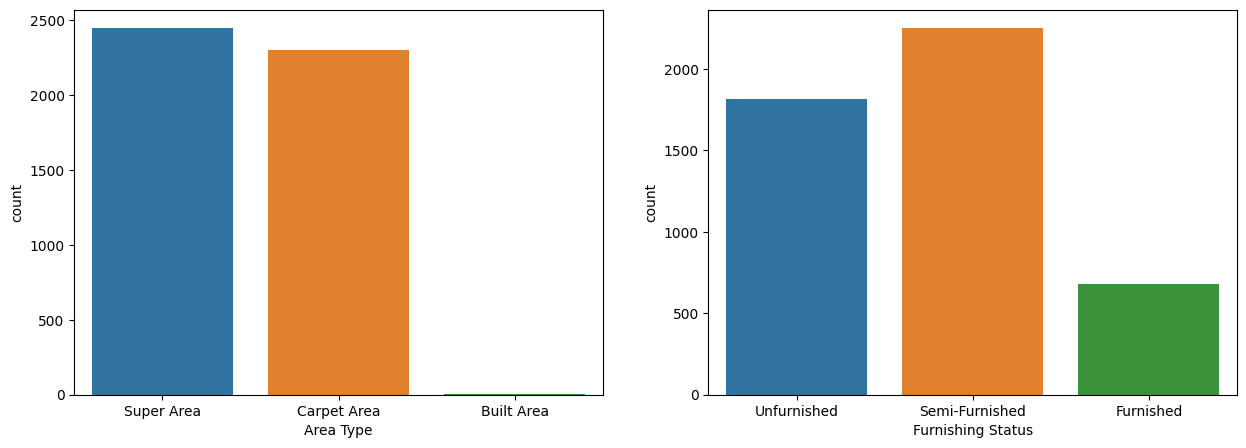

In [10]:
#Count of aretype demands
fig,ax = plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
ax=sns.countplot(df,x='Area Type')
#count of furnishing type demands
plt.subplot(1,2,2)
ax=sns.countplot(df,x='Furnishing Status')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_14192\1424213615.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


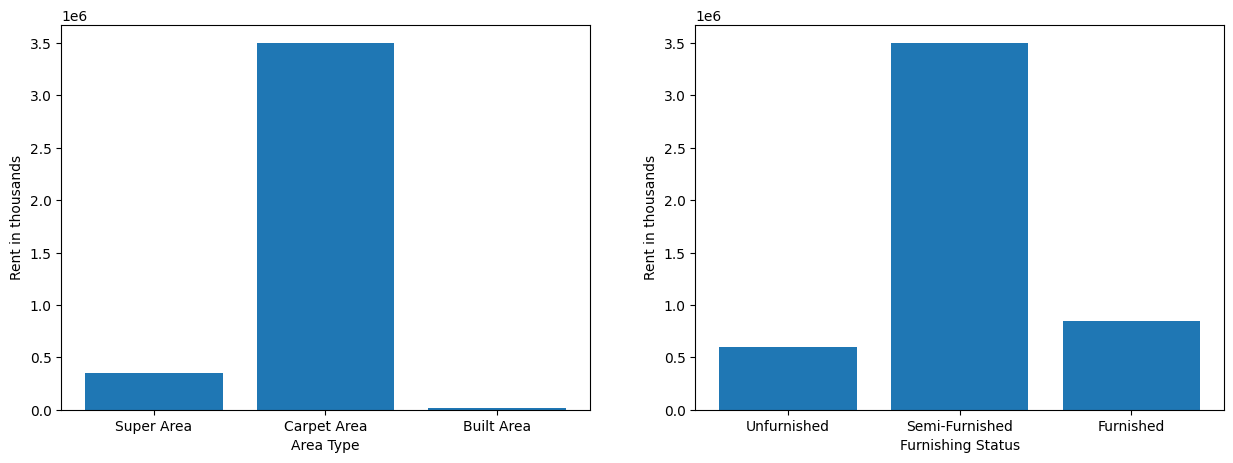

In [11]:
#Area Type vs Rent
fig,ax = plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(df['Area Type'],df['Rent'])
plt.xlabel("Area Type")
plt.ylabel("Rent in thousands")
#Furnishing Status Vs Rent
plt.subplot(1,2,2)
plt.bar(df['Furnishing Status'],df['Rent'])
plt.xlabel("Furnishing Status")
plt.ylabel("Rent in thousands")
plt.show()

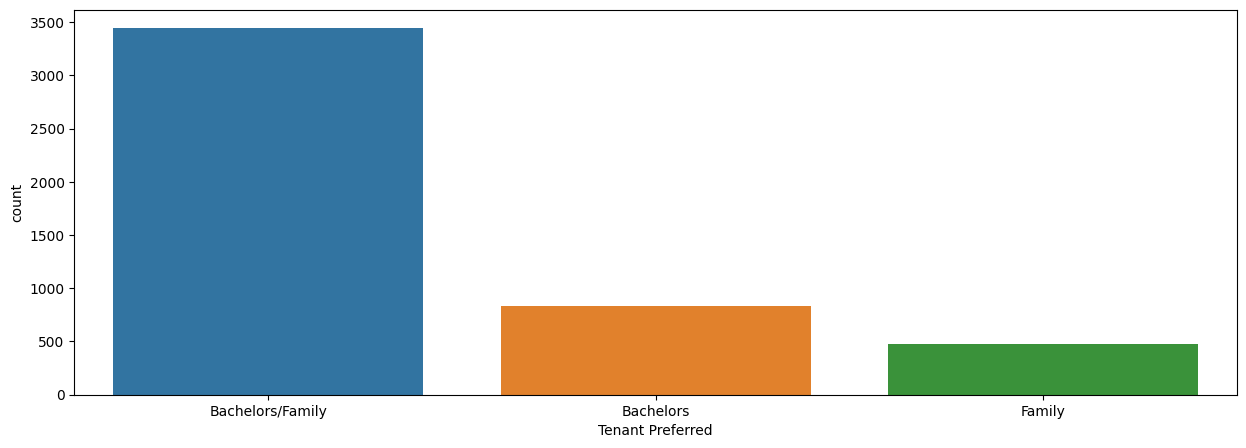

In [12]:
#majority of tenants overview
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(df,x='Tenant Preferred')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_14192\882476829.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".0%")


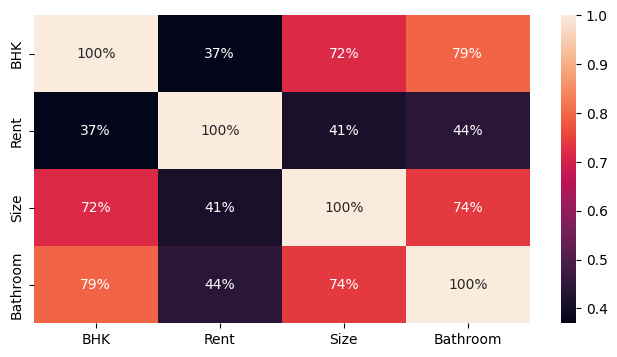

In [13]:
plt.figure(figsize=(8,4)) 
sns.heatmap(df.corr(),annot=True,fmt=".0%") 
plt.show()

In [19]:
#Encoding the string data to make it usable during the training of the models
from sklearn.preprocessing import OrdinalEncoder
art=OrdinalEncoder()
city=OrdinalEncoder()
furst=OrdinalEncoder()
df['Area Type']=art.fit_transform(df[['Area Type']])
df['City']=city.fit_transform(df[['City']])
df['Furnishing Status']=furst.fit_transform(df[['Furnishing Status']])
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,2.0,Bandel,4.0,2.0,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,2.0,"Phool Bagan, Kankurgachi",4.0,1.0,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,2.0,Salt Lake City Sector 2,4.0,1.0,Bachelors/Family,1,Contact Owner
3,2022-04-07,2,10000,800,1 out of 2,2.0,Dumdum Park,4.0,2.0,Bachelors/Family,1,Contact Owner
4,2022-09-05,2,7500,850,1 out of 2,1.0,South Dum Dum,4.0,2.0,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,1.0,Bandam Kommu,3.0,1.0,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,2.0,"Manikonda, Hyderabad",3.0,1.0,Bachelors/Family,3,Contact Owner
4743,2022-10-07,3,35000,1750,3 out of 5,1.0,"Himayath Nagar, NH 7",3.0,1.0,Bachelors/Family,3,Contact Agent
4744,2022-06-07,3,45000,1500,23 out of 34,1.0,Gachibowli,3.0,1.0,Family,2,Contact Agent


In [31]:
#Constructing a table X having only the required independent features
X=df.iloc[:,2:6]
X["BHK"]=df["BHK"]
X['Size'] = df['Size']
X['Area Type'] = df['Area Type']
X['City'] =df['City']
X['Furnishing Status'] = df['Furnishing Status']
X['Bathroom'] = df['Bathroom']
X=X.drop(['Floor'],axis=1)
X=X.drop(['Rent'],axis=1)
X


,Size,Area Type,BHK,City,Furnishing Status,Bathroom
0,1100,2.0,2,4.0,2.0,2
1,800,2.0,2,4.0,1.0,1
2,1000,2.0,2,4.0,1.0,1
3,800,2.0,2,4.0,2.0,1
4,850,1.0,2,4.0,2.0,1
...,...,...,...,...,...,...
4741,1000,1.0,2,3.0,1.0,2
4742,2000,2.0,3,3.0,1.0,3
4743,1750,1.0,3,3.0,1.0,3
4744,1500,1.0,3,3.0,1.0,2


XGBOOST

OUR TARGET VARIABLE IS 'RENT', here we use XGBOOST to train our dataset to predict rent prices of housing in the cities of INDIA

In [33]:
 #Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df["Rent"],test_size=0.30, random_state=42)

In [37]:
import xgboost as xgb
model= xgb.XGBRegressor()#initializing the xgboost model
model.fit(X_train,y_train)#training the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=25, ...)

In [ ]:
# max_depth=20,seed=25,random_state=25

CONCLUSION


In [38]:
#EVALUATING THE PREDICTIONS
y_pred_train=model.predict(X_train)#testing the model against training data
y_pred_test = model.predict(X_test)#testing the model against testing data
y_pred_test


array([ 17249.97 ,  15200.41 ,  18060.203, ...,  24499.986, 220000.   ,
        10000.079], dtype=float32)

In [39]:
from sklearn.metrics import r2_score
s=r2_score(y_train,y_pred_train)#calculating R2 score against training data
s1=r2_score(y_test,y_pred_test)#calculating R2 score against test data
s,s1

(0.9898712168391949, -1.6866233373767043)

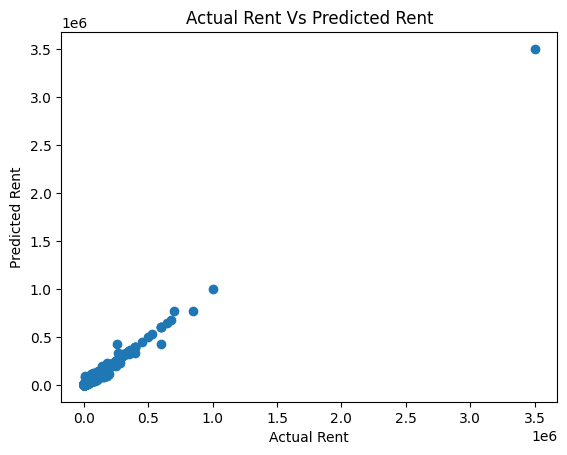

In [44]:
#Visualizing actual prices and predicted prices
plt.scatter(y_train,df_pred)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual Rent Vs Predicted Rent")
plt.show()